In [1]:
import tensorflow as tf
import gc


# checking if tensorfow is using gpu or cpu
gpus = tf.config.list_physical_devices("GPU")
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# limit gpu usage, prevent out of memory error
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# set random seed to get the same initial everytime run
tf.random.set_seed(42)

# Loading data

In [4]:
# loading data 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# Have a look at the data

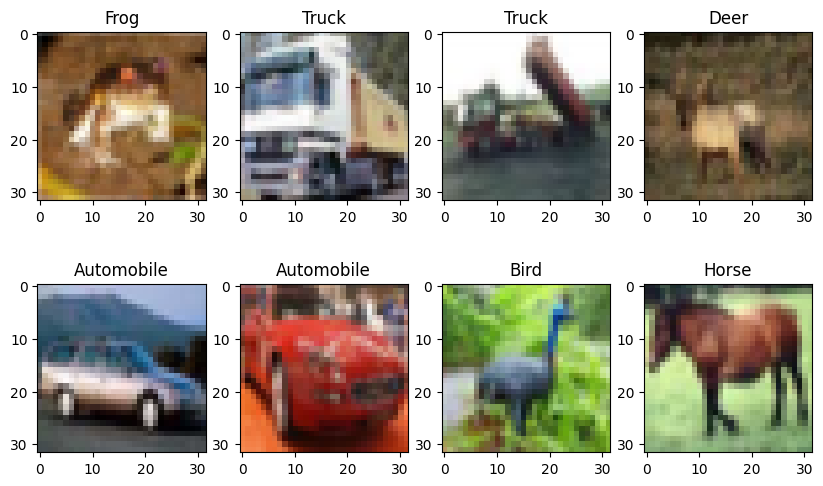

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot some random training images
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('on')

plt.show()

# Normalize data

In [6]:
# use min-max normalize
x_train, x_test = x_train/255.0, x_test/255.0

# Define some general configs

In [7]:
learning_rate = 0.01
batch_size = 16
input_shape = (32, 32, 3)
epochs = 5

# Simple model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, ReLU, MaxPool2D, Flatten, Dense, Softmax


model = Sequential([
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        input_shape=input_shape
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    Flatten(), 
    Dense(
        units=10
    ), 
    Softmax()
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 re_lu_1 (ReLU)              (None, 15, 15, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [9]:
from keras.optimizers import SGD, Adam
from keras.losses import SparseCategoricalCrossentropy


model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [10]:
model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True
)

Epoch 1/5


D:\UsingSpace\anaconda3\envs\tfgpu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3125/3125 [==============================] - 13s 3ms/step - loss: 1.3842 - accuracy: 0.5067 - val_loss: 1.1127 - val_accuracy: 0.6132
Epoch 2/5
3125/3125 [==============================] - 7s 2ms/step - loss: 1.0594 - accuracy: 0.6336 - val_loss: 1.0392 - val_accuracy: 0.6343
Epoch 3/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.9555 - accuracy: 0.6701 - val_loss: 0.9170 - val_accuracy: 0.6857
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.8952 - accuracy: 0.6912 - val_loss: 0.9324 - val_accuracy: 0.6812
Epoch 5/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.8528 - accuracy: 0.7055 - val_loss: 0.9197 - val_accuracy: 0.6828


In [11]:
gc.collect()  # clear memory so that error of memory got overflow does not happend

23393

# With full-connected layer

In [12]:
model = Sequential([
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        input_shape=input_shape
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    Flatten(), 
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10), 
    Softmax()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu_2 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 re_lu_3 (ReLU)              (None, 15, 15, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

In [13]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [14]:
model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True
)

Epoch 1/5
3125/3125 [==============================] - 9s 3ms/step - loss: 1.4508 - accuracy: 0.4728 - val_loss: 1.1485 - val_accuracy: 0.5930
Epoch 2/5
3125/3125 [==============================] - 8s 3ms/step - loss: 1.1022 - accuracy: 0.6113 - val_loss: 1.0463 - val_accuracy: 0.6355
Epoch 3/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.9810 - accuracy: 0.6543 - val_loss: 0.9364 - val_accuracy: 0.6775
Epoch 4/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.9102 - accuracy: 0.6830 - val_loss: 0.9251 - val_accuracy: 0.6755
Epoch 5/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.8623 - accuracy: 0.7010 - val_loss: 0.9090 - val_accuracy: 0.6860


In [15]:
gc.collect()

1385

# Larger but no fully connect layers

In [16]:
model = Sequential([
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        input_shape=input_shape
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),

    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    
    Flatten(), 
    Dense(units=10), 
    Softmax()
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu_4 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 re_lu_5 (ReLU)              (None, 15, 15, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

In [17]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [18]:
model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True
)

Epoch 1/5
3125/3125 [==============================] - 9s 3ms/step - loss: 1.4559 - accuracy: 0.4732 - val_loss: 1.1641 - val_accuracy: 0.5800
Epoch 2/5
3125/3125 [==============================] - 8s 3ms/step - loss: 1.1070 - accuracy: 0.6092 - val_loss: 1.0333 - val_accuracy: 0.6415
Epoch 3/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.9799 - accuracy: 0.6567 - val_loss: 0.9283 - val_accuracy: 0.6798
Epoch 4/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.9084 - accuracy: 0.6829 - val_loss: 0.9176 - val_accuracy: 0.6820
Epoch 5/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.8595 - accuracy: 0.7013 - val_loss: 0.8643 - val_accuracy: 0.7061


In [19]:
model.save("best.h5")  # save the best model with the highest accuracy

In [20]:
gc.collect()

1385

# Larger but with fully-connectd layers

In [21]:
model = Sequential([
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        input_shape=input_shape
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),

    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
    ),
    ReLU(),
    MaxPool2D(pool_size=3, strides=2),
    
    Flatten(), 
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10), 
    Softmax()
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu_7 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 re_lu_8 (ReLU)              (None, 15, 15, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

In [22]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [23]:
model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True
)

Epoch 1/5
3125/3125 [==============================] - 10s 3ms/step - loss: 1.5482 - accuracy: 0.4260 - val_loss: 1.2414 - val_accuracy: 0.5474
Epoch 2/5
3125/3125 [==============================] - 9s 3ms/step - loss: 1.1697 - accuracy: 0.5797 - val_loss: 1.1593 - val_accuracy: 0.5861
Epoch 3/5
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0302 - accuracy: 0.6365 - val_loss: 1.0037 - val_accuracy: 0.6510
Epoch 4/5
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9458 - accuracy: 0.6665 - val_loss: 0.9859 - val_accuracy: 0.6609
Epoch 5/5
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8883 - accuracy: 0.6902 - val_loss: 0.8840 - val_accuracy: 0.6926


In [24]:
gc.collect()

1385

# Using Residual Block

In [25]:
from keras.layers import Add


def residual_block(inputs, filters, strides: int = 1):
    x = Conv2D(
        filters=filters,
        strides=strides,
        padding='same',
        kernel_size=(3, 3),
    )(inputs)
    x = ReLU()(x)
    x = Conv2D(
        filters=filters,
        strides=(1, 1),
        padding='same',
        kernel_size=(3, 3),
    )(x)

    if strides != 1 or filters != inputs.shape[0]:
        inputs = Conv2D(
            filters=filters,
            strides=strides,
            padding='same',
            kernel_size=(1, 1),
            
        )(inputs)
    x = Add()([x, inputs])
    return ReLU()(x)

In [26]:
from keras.models import Model
from keras.layers import Input, GlobalAveragePooling2D


inputs = Input(input_shape)
x = Conv2D(
    filters=32,
    strides=(1, 1),
    padding='same',
    kernel_size=(3, 3),
)(inputs)
x = ReLU()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)
x = residual_block(
    inputs=x,
    filters=16,
    strides=1
)
x = residual_block(
    inputs=x,
    filters=16,
    strides=1
)
x = residual_block(
    inputs=x,
    filters=32,
    strides=2
)
x = residual_block(
    inputs=x,
    filters=32,
    strides=1
)
x = GlobalAveragePooling2D()(x)
x = Dense(units=10)(x)
x = Softmax()(x)

model = Model(
    inputs=inputs,
    outputs=x
)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 re_lu_10 (ReLU)                (None, 32, 32, 32)   0           ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 15, 15, 32)  0           ['re_lu_10[0][0]']               
 )                                                                                            

In [27]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True
)

Epoch 1/5
3125/3125 [==============================] - 18s 6ms/step - loss: 1.7234 - accuracy: 0.3481 - val_loss: 1.4148 - val_accuracy: 0.4862
Epoch 2/5
3125/3125 [==============================] - 17s 6ms/step - loss: 1.3096 - accuracy: 0.5211 - val_loss: 1.2791 - val_accuracy: 0.5432
Epoch 3/5
3125/3125 [==============================] - 17s 5ms/step - loss: 1.1541 - accuracy: 0.5829 - val_loss: 1.0933 - val_accuracy: 0.6059
Epoch 4/5
3125/3125 [==============================] - 17s 5ms/step - loss: 1.0533 - accuracy: 0.6218 - val_loss: 1.0533 - val_accuracy: 0.6242
Epoch 5/5
3125/3125 [==============================] - 17s 5ms/step - loss: 0.9770 - accuracy: 0.6515 - val_loss: 0.9781 - val_accuracy: 0.6496


In [28]:
model.save("resnet.h5")  # save the resnet model